In [1]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
from scipy.optimize import curve_fit


In [2]:
df = pd.read_csv('C:/Users/Michael/University of Cambridge/PHY_US Group - Documents/MBQD-Shared/AION/Data/2023/08/22/Decay Rate Lifetime Experiments/push_decay_02.csv',skiprows=[1])

In [3]:
df.iloc[:,1] = df.iloc[:,1]+30

In [4]:

df = df[df.iloc[:,0]  >= 1500]

df = df[df.iloc[:,0]  <= 6000]

In [5]:
def drop_rows_after_each_row(df, n):

    # List to store the indices of rows to keep
    keep_rows = []
    
    # Iterate over the rows
    for idx in range(0, len(df), n+1):
        keep_rows.append(idx)
    
    return df.iloc[keep_rows]
    
df = drop_rows_after_each_row(df, 10)

In [6]:
window_size = 8000
y_new = np.convolve(df.iloc[:,1], np.ones(window_size)/window_size, mode='valid')

In [7]:
x = df.iloc[:,0][(window_size-1)//2:-(window_size-1)//2]

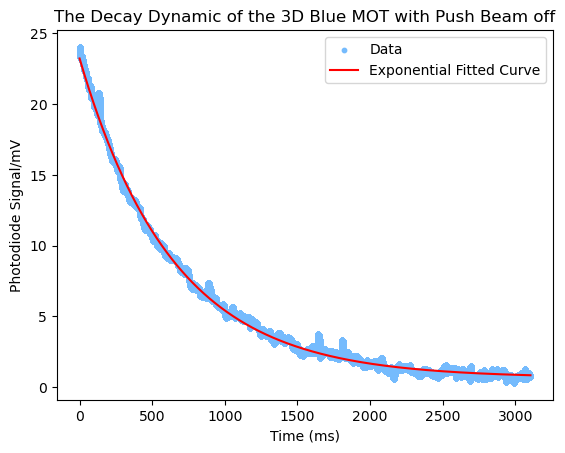

In [8]:
threshold = 2890

# Use boolean indexing to filter values
filtered_indices = x >= threshold
filtered_x = x[filtered_indices]-2890
filtered_y = y_new[filtered_indices]

def exponential_decay(x, a, b, c):
    return a * np.exp(-b * x) + c


p0=[6.24245103*10**7, 1.08006444*10**(-1), 5.12469870*10**4]
params, covariance = curve_fit(exponential_decay,filtered_x, filtered_y,p0, maxfev=10000)

a_opt, b_opt, c_opt = params

y_fit = exponential_decay(filtered_x, a_opt, b_opt, c_opt)

plt.scatter(filtered_x, filtered_y,s=10,color = "xkcd:sky blue", label='Data')

plt.plot(filtered_x, y_fit, label='Exponential Fitted Curve', color='red')

plt.xlabel('Time (ms)')
plt.ylabel("Photodiode Signal/mV")
plt.title('The Decay Dynamic of the 3D Blue MOT with Push Beam off')
plt.legend()

# Show the plot
plt.show()

In [9]:
## On your .ipynb, import this plotting_style by adding in and uncommenting the following lines:

import matplotlib.pyplot as plt
import sys
sys.path.append('C:/Users/Michael/Dropbox/AION/Projects')  # Replace with the relevant path that contains this script
from plotting_style import set_plotting_style
set_plotting_style()

Initialising plotting style...
Success! Plotting style initialised.


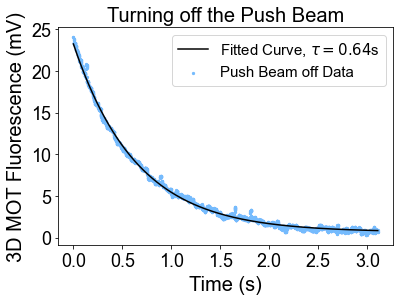

In [23]:
threshold = 2890

# Use boolean indexing to filter values
filtered_indices = x >= threshold
filtered_x = x[filtered_indices]-2890
filtered_y = y_new[filtered_indices]

def exponential_decay(x, a, b, c):
    return a * np.exp(-b * x) + c


p0=[6.24245103*10**7, 1.08006444*10**(-1), 5.12469870*10**4]
params, covariance = curve_fit(exponential_decay,filtered_x, filtered_y,p0, maxfev=10000)

a_opt, b_opt, c_opt = params

tau = 1/b_opt/1000

y_fit = exponential_decay(filtered_x, a_opt, b_opt, c_opt)

plt.scatter([i/1000 for i in filtered_x][::500], filtered_y[::500],s=5,color = "xkcd:sky blue", label='Push Beam off Data')

plt.plot([i/1000 for i in filtered_x], y_fit, label=r'Fitted Curve, $\tau = %.2f$s' %tau, color='black')

plt.xticks(np.arange(0, 3.5, 0.5))

plt.xlabel('Time (s)')
plt.ylabel("3D MOT Fluorescence (mV)")
plt.title('Turning off the Push Beam')
plt.legend()

# Show the plot
# plt.show()

plt.savefig('Push_Decay_Signal.png', dpi=300, bbox_inches='tight')
plt.savefig('Push_Decay_Signal.pdf', dpi=300, bbox_inches='tight')


In [12]:
print("The decay constant is", b_opt, "ms")
print("The lifetime is", 1/b_opt, "ms")

The decay constant is 0.0015564456142398572 ms
The lifetime is 642.4895228275508 ms
